# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully.

Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [29]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [30]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [31]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : integer or real, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : integer or real
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off 

Payload Mass vs Flight number scatter plot. With hue = class

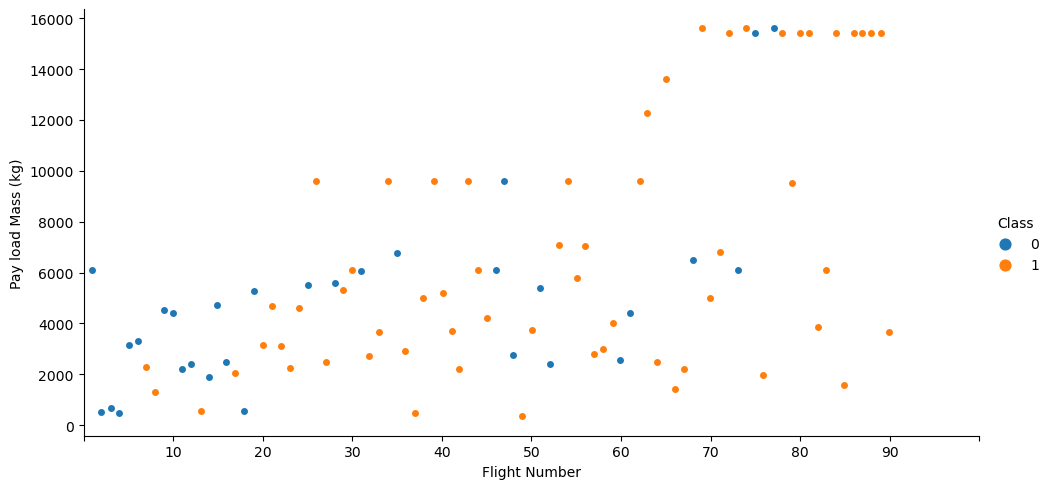

In [32]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 2)

plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Pay load Mass (kg)",fontsize=10)

plt.xticks(np.arange(-1,100,10))
plt.show()

Result 1:

1. We see that as flight number inceases so does the payload mass.
2. We see that sucess rate gradually increases as flight number increases.
3. All first stages landed sucessfully for flights > 80 
4. All first stages failed to land sucessfully for flights < 5 


### 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


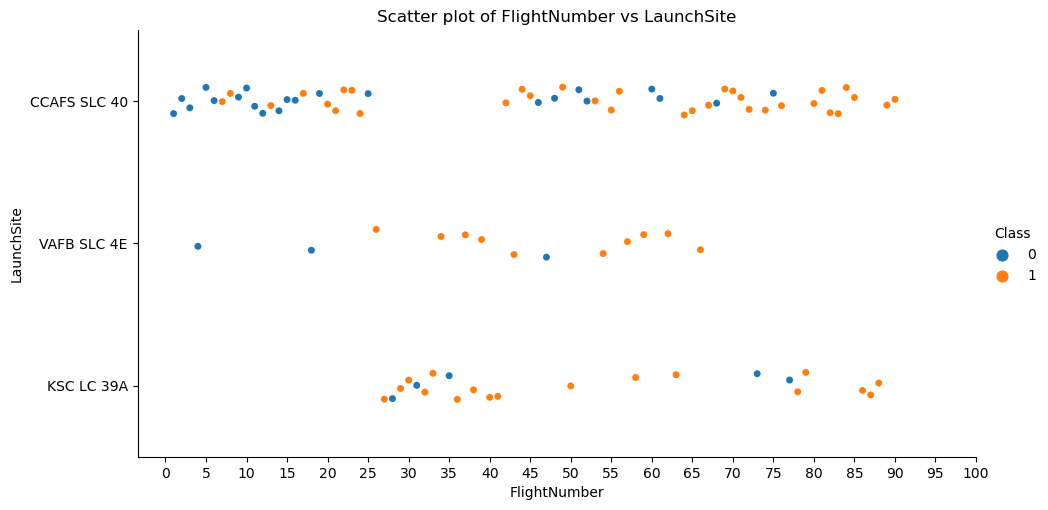

In [33]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, aspect=2)

plt.xlabel('FlightNumber')
plt.ylabel('LaunchSite')
plt.title('Scatter plot of FlightNumber vs LaunchSite')

plt.xticks(np.arange(0,105,5))

plt.show()

Results 2: 

1. We see evidence that first stage landing sucess rate increases when flight number inceases.
2. We see weakest correlation for launchsite KSC LC 39A,  with regards to first stage landing sucess rate. 
3. We see strongest correlation for VAFB SLC 4E with regards to first stage landing sucess rate.

### 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


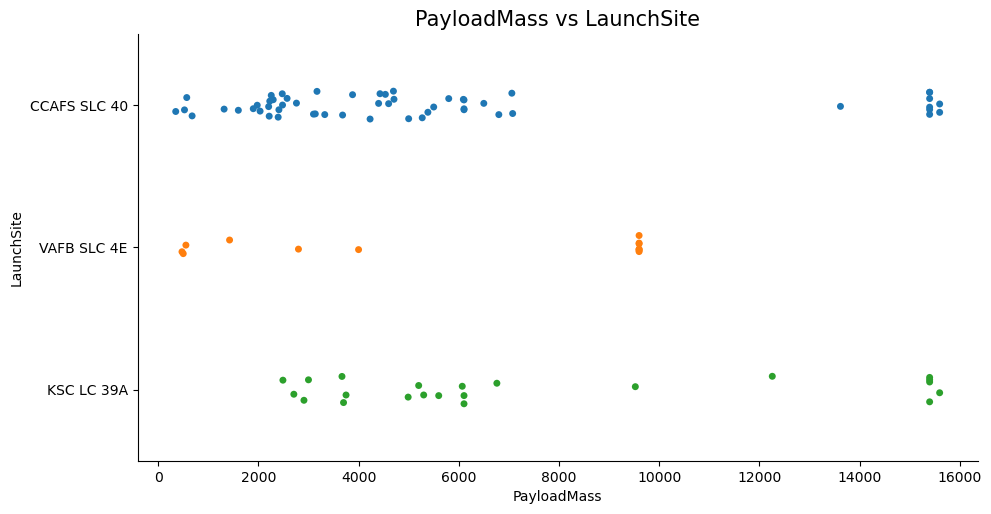

In [34]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and 
# y axis to be the launch site, and hue to be the class value

sns.catplot(x='PayloadMass',y='LaunchSite', data=df, aspect=2)

plt.xlabel('PayloadMass', fontsize=10)
plt.ylabel('LaunchSite', fontsize=10)
plt.title('PayloadMass vs LaunchSite',fontsize=15)

plt.show()


Results3:

1. We see for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass (greater than 10000).

###  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type. Let's create a `bar chart` for the sucess rate of each orbit. 


1st create the dataset.

In [35]:
df2 = df.groupby(['Orbit'])['Class'].mean().reset_index()
df2

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


Sort data

In [36]:
df_bar = df2.sort_values('Class', ascending=False)
df_bar

,Orbit,Class
0,ES-L1,1.000000
1,GEO,1.000000
3,HEO,1.000000
9,SSO,1.000000
10,VLEO,0.857143
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
4,ISS,0.619048
2,GTO,0.518519


Now we create the bar chart

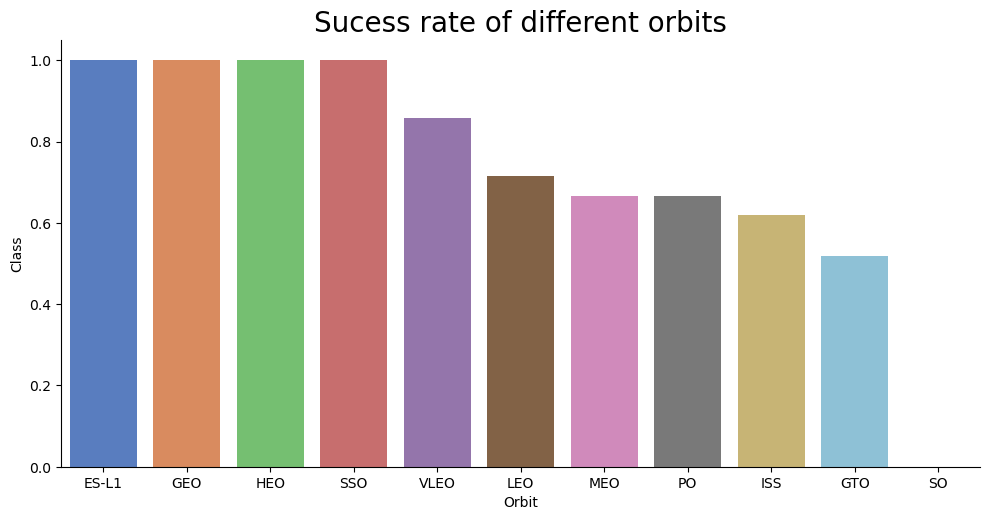

In [37]:
sns.catplot(x='Orbit',y='Class',data=df_bar, kind='bar', aspect=2, palette = 'muted')

plt.title('Sucess rate of different orbits', fontsize=20)
plt.show()


Results4:

1. We see that the orbits ES-L1, GEO, HEO and SSO has 100% sucess rate for first stage landings. 
2. We see that orbit SO has 0% sucess rate for first stage landings. 

So sucess rate for first stage landings is correlated to the orbit we attempting to reach. 


###  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


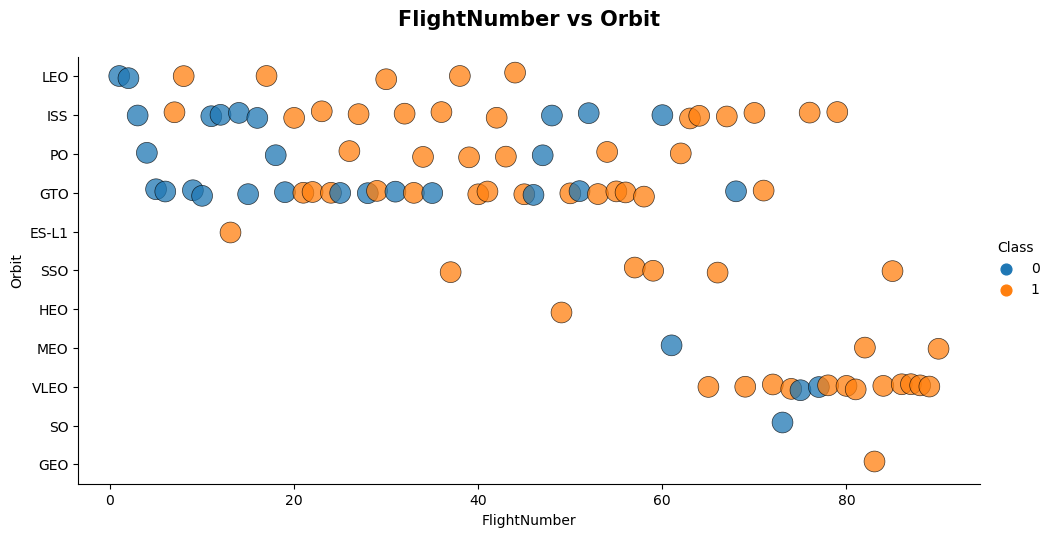

In [38]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', data=df, hue='Class', aspect=2, s=15, edgecolor='black', linewidth=0.5, alpha=0.75)

plt.title('FlightNumber vs Orbit\n', fontsize=15, fontweight='bold')
plt.ylabel('Orbit', fontsize=10)
plt.xlabel('FlightNumber', fontsize=10)
plt.show()


Result6:
 
1. In the LEO orbit the success appears stronly related to the number of flights.
2. There seems to be no strong relationship between flight number and sucess of first stange landing when in GTO orbit.

3. We again see that the orbits ES-L1, GEO, HEO and SSO has 100% sucess rate. 
4. We again see that orbit SO has 0% sucess rate for first stage landings.

### 5: Visualize the relationship between Payload and Orbit type


Does payload mass impact the orbit we will aim to take?

In [39]:
df_sorted = df.sort_values('PayloadMass', ascending=False)

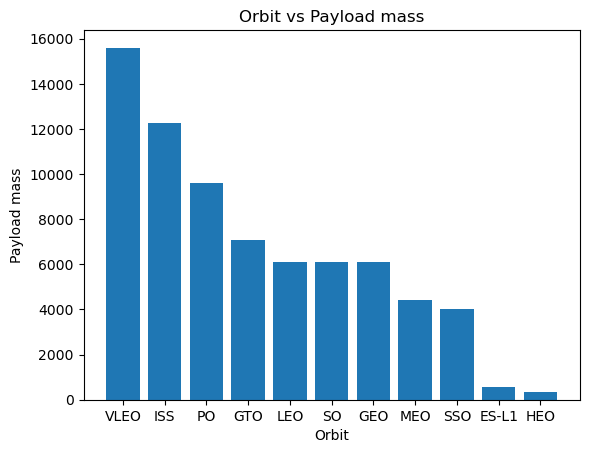

In [40]:
# Orbit vs payload mass using matplotlib aka plt. just another way to create bar plots

x=df_sorted['Orbit']
y=df_sorted['PayloadMass']

plt.bar(x,y)
plt.xlabel('Orbit')
plt.ylabel('Payload mass')
plt.title('Orbit vs Payload mass')

plt.show()

Results5:
    
We see that they payload mass is correlated with the orbit. 
But this is not directly linked to the question we want to answer around teh first stage landing sucess rate.

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


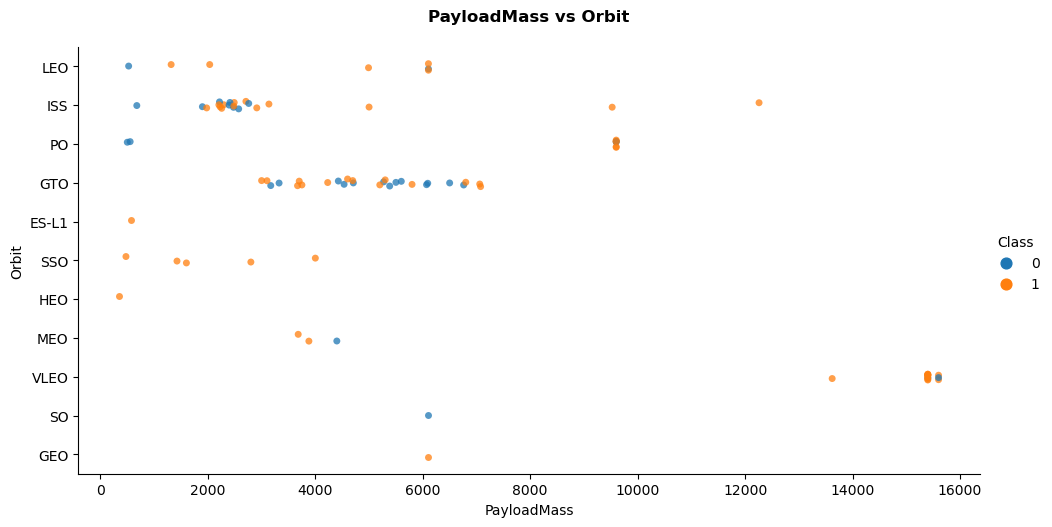

In [41]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.catplot(x='PayloadMass', y='Orbit', data=df, hue='Class', aspect=2, alpha=0.75)

plt.xlabel('PayloadMass')
plt.ylabel('Orbit')

plt.title('PayloadMass vs Orbit\n', fontweight='bold')

plt.show()

Results7:

1. With heavy payloads the successful landing rate are more for PO, LEO and ISS.
2. However for GTO we cannot distinguish this well as both sucessful landing rate and unsucessful landingare both there here.


###  6: Visualize the launch success yearly trend


We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [42]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year


In [43]:
Extract_year('date')

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

In [44]:
df['Date'] = year

In [45]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Sucess rate for each year


In [46]:
df3=df.groupby(['Date'])['Class'].mean().reset_index()
df3.head()

,Date,Class
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333


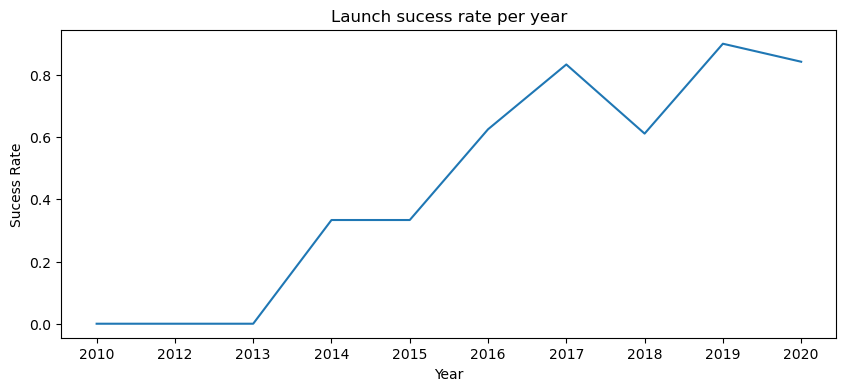

In [47]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

plt.figure(figsize=(10,4))
sns.lineplot(x='Date',y='Class', data=df3)

plt.xlabel('Year')
plt.ylabel('Sucess Rate')
plt.title('Launch sucess rate per year')

plt.show()

Result 8: 

1. We can observe that the sucess rate since 2013 has been increasing. 
2. We can see there were slight decreses in 2018 and 2020. 
3. We can see that general trajetory is up for sucess rate with time. 


## Features Engineering


We have preliminary insights about how each important variable affect the success rate. We will select the features that will be used in success prediction in the future.


We crate a dataframe for these freatures: 

In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


###  7: Create dummy variables to categorical columns

We used the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Our result dataframe must include all features including the encoded ones.

In [49]:
# We Use get_dummies() function on the categorical columns

features_one_hot = pd.get_dummies(features, columns = ['Orbit','LaunchSite','LandingPad','Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [50]:
features_one_hot.dtypes

FlightNumber      int64
PayloadMass     float64
Flights           int64
GridFins           bool
Reused             bool
                 ...   
Serial_B1056      uint8
Serial_B1058      uint8
Serial_B1059      uint8
Serial_B1060      uint8
Serial_B1062      uint8
Length: 80, dtype: object

In [51]:
# We use astype function
features_one_hot.astype('float').dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

This is the shape of our new dataframe called features_one_hot

In [52]:
features_one_hot.shape

(90, 80)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


features_one_hot.to_csv('dataset_part\_3.csv', index=False)